In [1]:
!pip install numpy pandas matplotlib scikit-learn umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 506.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


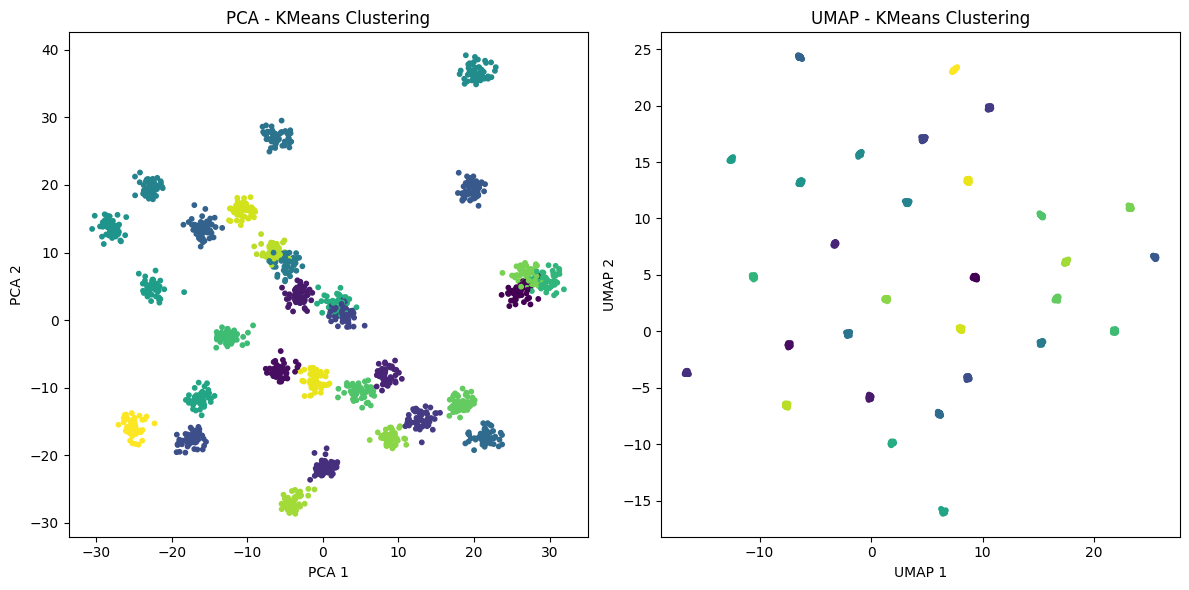

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import umap.umap_ as umap


n_samples = 1500
n_features = 100
n_clusters = 30

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# datos
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
df['cluster'] = y

# Realizar clustering con KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['kmeans_labels'] = kmeans.fit_predict(X)

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
df['pca_1'] = pca.fit_transform(X)[:, 0]
df['pca_2'] = pca.fit_transform(X)[:, 1]

# Reducción de dimensionalidad usando UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(X)
df['umap_1'] = umap_embedding[:, 0]
df['umap_2'] = umap_embedding[:, 1]

# Visualización de los resultados de PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['pca_1'], df['pca_2'], c=df['kmeans_labels'], cmap='viridis', s=10)
plt.title('PCA - KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Visualización de los resultados de UMAP
plt.subplot(1, 2, 2)
plt.scatter(df['umap_1'], df['umap_2'], c=df['kmeans_labels'], cmap='viridis', s=10)
plt.title('UMAP - KMeans Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
plt.show()
